In [1]:
config = {
    'host': 'localhost',
    'port' : 5432,
    'database': 'mimic_iv',
    'user': 'mimic_read_only_user',
    'password': 'mimiciv',
    'schema': 'hosp'
}

from sqlalchemy import create_engine, text
import pandas as pd



query = """
SELECT 
    p.*,
    CASE 
        WHEN matches[1] IS NOT NULL THEN CAST(matches[1] AS FLOAT)
        ELSE NULL
    END AS quantity,
    CASE 
        WHEN matches[1] IS NOT NULL THEN matches[3]
        ELSE NULL
    END AS unit,
    CASE 
        WHEN matches[1] IS NOT NULL THEN TRIM(BOTH ' ' FROM matches[5])
        ELSE p.prod_strength
    END AS form
FROM 
    hosp.prescriptions p,
    LATERAL REGEXP_MATCHES(p.prod_strength, '^([0-9]+(\.[0-9]+)?)?[ ]?([a-zA-Z]+(/[a-zA-Z]+)?)?([a-zA-Z ]+)$') AS matches
LIMIT 200000
    """





engine = create_engine(f'postgresql://{config["user"]}:{config["password"]}@{config["host"]}:{config["port"]}/{config["database"]}')
with engine.connect() as connection:
    df = pd.read_sql_query(text(query), connection)
df



<>:15: SyntaxWarning: invalid escape sequence '\.'
<>:15: SyntaxWarning: invalid escape sequence '\.'
C:\Users\jvoyer\AppData\Local\Temp\4\ipykernel_15804\4022692885.py:15: SyntaxWarning: invalid escape sequence '\.'
  query = """
C:\Users\jvoyer\AppData\Local\Temp\4\ipykernel_15804\4022692885.py:15: SyntaxWarning: invalid escape sequence '\.'
  query = """


OperationalError: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [2]:
df[df['dose_val_rx'].str.contains('-')]

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route,quantity,unit,form
58,10959054,29665973,13891188,10959054-583,583.0,P91MW8,2186-12-17 22:00:00,2186-12-19 17:00:00,MAIN,Zolpidem Tartrate,...,None,2.5-5,mg,0.5-1,TAB,NaN,PO,5.0,mg,Tablet
63,10959054,29665973,22306696,10959054-561,561.0,P91MW8,2186-12-17 22:00:00,2186-12-20 17:00:00,MAIN,Aluminum-Magnesium Hydrox.-Simethicone,...,None,15-30,mL,0.5-1,UDCUP,NaN,PO,30.0,mL,UDCup
71,10959054,29665973,34646412,10959054-623,623.0,P70N8Q,2186-12-19 09:00:00,2186-12-20 17:00:00,MAIN,TraMADOL (Ultram),...,None,25-50,mg,0.5-1,TAB,NaN,PO,50.0,mg,Tablet
75,10959054,29665973,53335869,10959054-585,585.0,P91MW8,2186-12-17 22:00:00,2186-12-20 17:00:00,MAIN,Albuterol-Ipratropium,...,None,1-2,PUFF,0.01-0.02,CAN,NaN,IH,14.7,g,Inhaler
92,10959054,29665973,87937273,10959054-618,618.0,P90MUK,2186-12-18 21:00:00,2186-12-19 08:00:00,MAIN,OxycoDONE (Immediate Release),...,None,5-10,mg,1-2,TAB,NaN,PO,5.0,mg,Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199967,11140311,27454707,3463504,11140311-74,74.0,P02L7J,2147-05-20 17:00:00,2147-05-23 18:00:00,MAIN,OxyCODONE (Immediate Release),...,None,5-10,mg,1-2,TAB,NaN,PO/NG,5.0,mg,Tablet
199968,11140311,27454707,19097944,11140311-69,69.0,P02L7J,2147-05-20 17:00:00,2147-05-23 18:00:00,MAIN,Acetaminophen,...,None,500-1000,mg,1-2,TAB,NaN,PO,500.0,mg,Tablet
199972,11140311,27454707,42295351,11140311-47,47.0,P86JLW,2147-05-20 17:00:00,2147-05-21 17:00:00,MAIN,Ketorolac,...,None,15-30,mg,1-2,VIAL,NaN,IV,15.0,mg/mL,Vial
199973,11140311,27454707,46458228,11140311-47,47.0,P86JLW,2147-05-20 17:00:00,2147-05-21 17:00:00,MAIN,Ketorolac,...,None,15-30,mg,0.5-1,VIAL,NaN,IV,30.0,mg/mL,Vial


In [3]:
df.loc[df['dose_val_rx'].str.contains('to'), 'dose_val_rx'] = df['dose_val_rx'].str.replace('to', '-')

In [4]:
df['dose_val_rx'] = df['dose_val_rx'].str.strip('-')

In [5]:
#check for ranges in dose_val_rx (e.g. 1-2)*
import numpy as np

df["dose_val_rx"] = df['dose_val_rx'].where(df['dose_val_rx'].str.contains('-'), df['dose_val_rx'].str.split('-').apply(lambda x: [float(i.replace(",",'.')) for i in x]).apply(lambda x: np.mean(x)))

ValueError: could not convert string to float: '1.62 % (4'

In [6]:
df.loc[~df['dose_val_rx'].apply(lambda x : isinstance(x, float)),"dose_val_rx"]=df[~df['dose_val_rx'].apply(lambda x : isinstance(x, float))]["dose_val_rx"].apply(lambda x: x.split('-')).apply(lambda x: [float(i) for i in x]).apply(lambda x: np.mean(x))
df.loc[~df['form_val_disp'].apply(lambda x : isinstance(x, float)),"form_val_disp"]=df[~df['form_val_disp'].apply(lambda x : isinstance(x, float))]["form_val_disp"].apply(lambda x: x.split('-')).apply(lambda x: [float(i) for i in x]).apply(lambda x: np.mean(x))

In [7]:

# check if the dose_unit_rx is a milli
df["dose_val_rx"]=df["dose_val_rx"].astype(float)
records = df.to_dict(orient='records')
for record in records:
    if isinstance(record['dose_unit_rx'], str):
        record['dose_unit_rx'] = record['dose_unit_rx'].strip()
        if record['dose_unit_rx'].startswith('m'):
            record['dose_val_rx'] = record['dose_val_rx'] / 1000
            record['dose_unit_rx'] = record['dose_unit_rx'][1:]
    if isinstance(record['form_unit_disp'], str):
        record['form_unit_disp'] = record['form_unit_disp'].strip()
        if record['form_unit_disp'].startswith('m'):
            record['form_val_disp'] = record['form_val_disp'] / 1000
            record['form_unit_disp'] = record['form_unit_disp'][1:]
            
    if isinstance(record['unit'], str):
        record['unit'] = record['unit'].strip()
        if record['unit'].startswith('m'):
            record['quantity'] = record['quantity'] / 1000
            record['unit'] = record['unit'][1:]
            if record['unit'] == 'l' : record['unit'] = 'L'
            if record['unit'] == 'G' : record['unit'] = 'g'
        if "/" in record['unit']:
            nom, denom = record['unit'].split('/')
            if denom.strip().startswith('m'):
                record['quantity'] = record['quantity'] * 1000
                denom = denom[1:]
            if denom == 'l' : denom = 'L'
            if denom == 'G' : denom = 'g'
            if nom == 'l' : nom = 'L'
            if nom == 'G' : nom = 'g'
            new_unit = nom + '/' + denom
            record['unit'] = new_unit
        
df = pd.DataFrame(records)
df[['drug','dose_val_rx', 'dose_unit_rx', 'quantity', 'unit', 'form', 'prod_strength']]


,drug,dose_val_rx,dose_unit_rx,quantity,unit,form,prod_strength
0,5% Dextrose,0.050,L,0.050,L,Bag,50 mL Bag
1,Ibuprofen,0.500,g,0.600,g,Tablet,600mg Tablet
2,Potassium Chloride,0.040,Eq,0.010,Eq,ER Tablet,10mEq ER Tablet
3,5% Dextrose,0.100,L,0.100,L,Bag,100 mL Bag
4,Doxycycline Hyclate,0.100,g,0.100,g,Vial,100 mg Vial
...,...,...,...,...,...,...,...
199995,D5 1/2NS,1.000,L,1.000,L,Bag,1000mL Bag
199996,Acetaminophen,0.650,g,0.325,g,Tablet,325mg Tablet
199997,Ondansetron,0.004,g,0.004,g,Tablet,4 mg Tablet
199998,Ibuprofen,0.800,g,0.400,g,Tablet,400mg Tablet


In [8]:
df.keys()   

Index(['subject_id', 'hadm_id', 'pharmacy_id', 'poe_id', 'poe_seq',
       'order_provider_id', 'starttime', 'stoptime', 'drug_type', 'drug',
       'formulary_drug_cd', 'gsn', 'ndc', 'prod_strength', 'form_rx',
       'dose_val_rx', 'dose_unit_rx', 'form_val_disp', 'form_unit_disp',
       'doses_per_24_hrs', 'route', 'quantity', 'unit', 'form'],
      dtype='object')

In [9]:
import seaborn as sns
way= df.groupby(['gsn'])[["unit","form"]].nunique()
way



,unit,form
gsn,,
,5,6
000018,1,1
000019,1,1
000090,1,1
000091,1,1
...,...,...
078262,1,1
078733,1,1
078791,1,1


> On va travailler sur les références de médicaments présentant 1 seule forme et 1 seule unité

In [10]:
way[(way['unit']==1) & (way['form']==1)]

,unit,form
gsn,,
000018,1,1
000019,1,1
000090,1,1
000091,1,1
000093,1,1
...,...,...
078262,1,1
078733,1,1
078791,1,1


In [11]:
work_df = df[df['gsn'].isin(way[(way['unit']==1) & (way['form']==1)].index)]

work_df

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route,quantity,unit,form
1,10791629,21819658,46855320,10791629-107,107.0,P83VKT,2171-01-16 15:00:00,2171-01-16 15:00:00,MAIN,Ibuprofen,...,None,0.500,g,0.83335,TAB,NaN,PO,0.600,g,Tablet
2,10791629,21819658,55268241,10791629-94,94.0,P83VKT,2171-01-15 19:00:00,2171-01-16 21:00:00,MAIN,Potassium Chloride,...,None,0.040,Eq,4.00000,TAB,1.0,PO,0.010,Eq,ER Tablet
4,10791629,21819658,58680366,10791629-87,87.0,P37BV6,2171-01-15 17:00:00,2171-01-16 11:00:00,MAIN,Doxycycline Hyclate,...,,0.100,g,1.00000,VIAL,2.0,IV,0.100,g,Vial
6,10791629,21819658,63026755,10791629-102,102.0,P83VKT,2171-01-16 12:00:00,2171-01-16 21:00:00,MAIN,Clindamycin,...,None,0.450,g,3.00000,CAP,4.0,PO,0.150,g,Cap
7,10791629,21819658,63405608,10791629-47,47.0,P75HZC,2171-01-14 11:00:00,2171-01-15 16:00:00,MAIN,Ibuprofen,...,None,0.600,g,1.00000,TAB,4.0,PO,0.600,g,Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,10958987,28465678,96525879,10958987-41,41.0,P408EG,2124-12-22 19:00:00,2124-12-24 09:00:00,BASE,D5 1/2NS,...,None,1.000,L,1.00000,L,NaN,IV,1.000,L,Bag
199996,10959007,21338482,642943,10959007-92,92.0,P743BY,2118-10-25 02:00:00,2118-10-26 22:00:00,MAIN,Acetaminophen,...,None,0.650,g,2.00000,TAB,NaN,PO/NG,0.325,g,Tablet
199997,10959007,21338482,5851476,10959007-96,96.0,P743BY,2118-10-25 02:00:00,2118-10-26 22:00:00,MAIN,Ondansetron,...,None,0.004,g,1.00000,TAB,NaN,PO/NG,0.004,g,Tablet
199998,10959007,21338482,9918114,10959007-115,115.0,P44Z0T,2118-10-26 12:00:00,2118-10-26 22:00:00,MAIN,Ibuprofen,...,None,0.800,g,2.00000,TAB,NaN,PO,0.400,g,Tablet


In [20]:
work_df.loc[:,'dispensation_qty'] = work_df.where(work_df['dose_unit_rx'] == work_df['unit'], work_df['dose_val_rx'] / work_df['quantity'], axis=0)

> On va vérifier si le champ_form_val_disp est bien renseigné

In [21]:
work_df['dispensation_delta'] =work_df['form_val_disp'] - work_df['dispensation_qty']
work_df
work_df[(work_df['form_val_disp'] - work_df['dispensation_qty'])!=0][['prod_strength','dose_val_rx','dose_unit_rx','quantity','unit','form','form_val_disp','form_unit_disp','dispensation_qty','dispensation_delta']]

C:\Users\jvoyer\AppData\Local\Temp\5\ipykernel_14232\953967689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_df['dispensation_delta'] =work_df['form_val_disp'] - work_df['dispensation_qty']


,prod_strength,dose_val_rx,dose_unit_rx,quantity,unit,form,form_val_disp,form_unit_disp,dispensation_qty,dispensation_delta
1,600mg Tablet,0.500,g,0.6000,g,Tablet,0.83335,TAB,0.833333,0.000017
18,12g Inhaler,2.000,PUFF,12.0000,g,Inhaler,0.02000,INH,0.166667,-0.146667
25,8 g Inhaler,1.500,PUFF,8.0000,g,Inhaler,0.01500,INH,0.187500,-0.172500
33,16g NASAL SPRAY,2.000,SPRY,16.0000,g,NASAL SPRAY,0.02000,AERO,0.125000,-0.105000
36,50mL Syringe,12.500,gm,0.0500,L,Syringe,0.50000,SYR,250.000000,-249.500000
...,...,...,...,...,...,...,...,...,...,...
199911,2.5mL Vial,1.000,NEB,0.0025,L,Vial,1.00000,VIAL,400.000000,-399.000000
199939,2.5mL Vial,1.000,NEB,0.0025,L,Vial,1.00000,VIAL,400.000000,-399.000000
199970,1000mL Bag,1.000,L,1.0000,L,Bag,0.00100,L,1.000000,-0.999000
199979,50mg/mL Vial,0.025,g,50.0000,g/L,Vial,0.50000,VIAL,0.000500,0.499500


# Cas spécifique : Hepatite C chronique sans mention de coma hépatique

In [2]:
sql_query = """
SELECT 'SELECT subject_id, hadm_id, ' ||
       STRING_AGG(DISTINCT 'SUM(CASE WHEN gsn = ''' || gsn || ''' THEN 1 ELSE 0 END) AS "GSN_' || gsn || '"', ', ')
       || ' FROM (select p.* from prescriptions p 
join diagnoses_icd di on p.hadm_id = di.hadm_id
where di.icd_code = ''07054'')sub GROUP BY subject_id, hadm_id ORDER BY subject_id, hadm_id;'
AS pivot_query
FROM (select p.* from prescriptions p 
join diagnoses_icd di on p.hadm_id = di.hadm_id
where di.icd_code = '07054')sub;
"""

engine = create_engine(f'postgresql://{config["user"]}:{config["password"]}@{config["host"]}:{config["port"]}/{config["database"]}')
with engine.connect() as connection:
    df = pd.read_sql_query(text(sql_query), connection)

pivot_query = df['pivot_query'][0]

with engine.connect() as connection:
    df = pd.read_sql_query(text(pivot_query), connection)
df.to_csv('dataset.csv', index=False)

OperationalError: (psycopg2.OperationalError) connection to server at "localhost" (::1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused (0x0000274D/10061)
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [10]:
import duckdb
import pandas as pd
from tqdm.notebook import tqdm, trange
import os
dataset = pd.read_csv('dataset.csv')
dataset.drop(columns=['subject_id','hadm_id', 'GSN_'], inplace=True)
dataset ['correct'] = True


#generate random mistakes in a duplicate dataset
import random as rd

if os.path.exists('dataset_mistakes.csv'):
    big_dataset = pd.read_csv('dataset_mistakes.csv')
else:
    def generate_mistakes(dataset):
        mistakes_2 = []
        for row in tqdm(dataset.to_dict('records')):
            for _ in range(len(dataset.keys())//20):
                mistake_key = rd.choice(dataset.keys())
                mistake_value = rd.choice(dataset[mistake_key].unique())
                row[mistake_key] = mistake_value
            row['correct'] = False
            mistakes_2.append(row)
        mistakes_2 = pd.DataFrame(mistakes_2)
        return mistakes_2

    big_dataset = pd.concat([dataset, generate_mistakes(dataset)], ignore_index=True)

    #shuffle the dataset

    big_dataset = big_dataset.sample(frac=1).reset_index(drop=True)
    big_dataset.to_csv('dataset_mistakes.csv', index=False)





  0%|          | 0/5138 [00:00<?, ?it/s]

Codes gsn de sofosbuvir : $[071748,072926,076305,076305]$

code gsn d' amiodarone : $000266$


In [2]:
from sklearn.cluster import KMeans
import numpy as np

classes = ['0', '1', '2+']

def classification (data) :
    for key in tqdm(data.columns):
        if key.startswith('GSN_'):
            data[key] = data[key].apply(lambda x: '0' if x == 0 else '1' if x == 1 else '2+')
    return data


In [3]:
classification(big_dataset)

  0%|          | 0/1598 [00:00<?, ?it/s]

  0%|          | 0/1598 [00:00<?, ?it/s]

GSN_000015 GSN_000018 GSN_000019 GSN_000090 GSN_000091 GSN_000141  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
10271          0          0          0          0          0          0   
10272          0          0          0          0          0          0   
10273          0          0          0          0          0          0   
10274          0          0          0          0          0          0   
10275          0          0          0          0          0          0   

      GSN_000239 GSN_000241 GSN_000265 GSN_000266  ... GSN_071674 GSN_071708  \
0              0          0          0          0  ...          0          0   
1              0          0          0          0  ...          0          0   
2              0          0          0          0  ...          0          0   
3              0          0          0          0  ...          0          0   
4              0          0          0          0  ...          0          0   
...          ...        ...        ...        ...  ...        ...        ...   
10271          0          0          0          0  ...          0          0   
10272          0          0          0          1  ...          0          0   
10273          0          0          0          0  ...          0          1   
10274          0          0          0          0  ...          0          0   
10275          0          0          0          0  ...          0          0   

      GSN_071748 GSN_072514 GSN_072862 GSN_072864 GSN_072866 GSN_072926  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
10271          0          1          0          0          0          0   
10272          0          0          0          0          0          0   
10273          0          0          0          0          0          0   
10274          0          0          0          0          0          0   
10275          0          0          0          0          0          0   

      GSN_074020 correct  
0              0    True  
1              0   False  
2              0    True  
3              0    True  
4              0    True  
...          ...     ...  
10271          0    True  
10272          0    True  
10273          0   False  
10274          0   False  
10275          0    True  

[10276 rows x 1598 columns]

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
train, test = train_test_split(big_dataset, test_size=0.4)


In [86]:
def getFormulasGranules(column_attr, info_table : pd.DataFrame) :
    basic_granules_table = pd.DataFrame(columns = ['Formula', 'Granule'])

    i = 0
    for attr in tqdm(column_attr) :
        group = info_table.groupby(attr).groups
        keys = list(group.keys())
        values = list(group.values())

        for key in keys :
            basic_granules_table.loc[i, 'Formula'] = str(attr) + ' = ' + str(key)
            basic_granules_table.loc[i, 'Granule'] = list(group[key])
            i += 1

    return basic_granules_table

In [87]:

from tqdm.notebook import tqdm, trange
def getGenerality(basic_gr_table: pd.DataFrame, info_table: pd.DataFrame) :
    U = len(info_table)
    for idx in tqdm(basic_gr_table.index) :
        obj_in_granule = len(basic_gr_table.loc[idx, 'Granule'])
        basic_gr_table.loc[idx, 'Generality'] = obj_in_granule / U

In [88]:
def countClasseGr(objects_Gr : pd.DataFrame, info_table: pd.DataFrame) :
    class_0 = 0
    class_1 = 0
    for obj in objects_Gr :
        if info_table.loc[obj, 'correct'] == True :
            class_1 += 1
        else :
            class_0 += 1
    return class_0, class_1

def getConfidence(basic_gr_table: pd.DataFrame, info_table: pd.DataFrame) :
    for idx in tqdm(basic_gr_table.index) :
        objects_Gr = basic_gr_table.loc[idx, 'Granule']
        class_0, class_1 = countClasseGr(objects_Gr, info_table)
        basic_gr_table.loc[idx, 'confidence_0'] = class_0 / len(objects_Gr)
        basic_gr_table.loc[idx, 'confidence_1'] = class_1 / len(objects_Gr)

In [89]:
def getCoverage(basic_gr_table : pd.DataFrame, info_table: pd.DataFrame) :
    if False in info_table[['correct']].values :
        class_0_count = len(info_table.groupby('correct').groups[0])
    else :
        class_0_count = 0

    if 1 in info_table[['correct']].values :
        class_1_count = len(info_table.groupby('correct').groups[1])
    else :
        class_1_count = 0

    for idx in tqdm(basic_gr_table.index) :
        objects_Gr = basic_gr_table.loc[idx, 'Granule']
        class_0, class_1 = countClasseGr(objects_Gr, info_table)
        basic_gr_table.loc[idx, 'coverage_0'] = class_0 / class_0_count
        basic_gr_table.loc[idx, 'coverage_1'] = class_1 / class_1_count

In [90]:
import numpy as np
def getEntropy(basic_gr_table : pd.DataFrame , info_table : pd.DataFrame) :
    res = 0

    for idx in tqdm(basic_gr_table.index) :
        for j in range(2) :
            p_ = basic_gr_table.loc[idx, 'confidence_' + str(j)]
            if p_ == 0 : 
                res+=0
            else :
                res += -p_ * np.log2(p_)
        basic_gr_table.loc[idx, 'Entropy'] = res
        res = 0

        

### Calcul de complexité : 
#### Taille du tableau d'information

soit $n$ le nombre de prescriptions $\newline$
soit $m$ le nombre de médicaments prescrits sur le dataset

on a un tableau Info_table de taille $n\cdot m$

#### Génération des granules

Ici j'ai regroupé les valeurs de chaque colonne (médicament) en 3 catégories :
 * 0 prescription
 * 1 prescription
 * 2 prescriptions ou plus

On a donc au total $3m$ formules au pire cas

#### Calcul de Généralité : 

Le calcul de généralité parcourt chaque granule pour connaitre sa taille.

Chaque granule est dans le pire des cas de taille $n$.

On a donc en complexité temporelle une fonction de complexité $O(3nm)$

#### Compter les classes d'un groupe d'objets : 

recherche dans info_table : complexité en $O(n)$

pour un échantillon de taille k : 

Décompte en complexité $(O(nk))$


#### Obtention de la confiance des formules : 

on a $3m$ formules de taille $n$ au pire cas.

pour chacune de ces formules on compte les classes du granule en complexité $O(n\cdot n)$ selon la formule précédente.

On a donc une complexité de $O(3m\cdot n^2)$ pour obtenir la confiance des formules.



#### Obtention de la couverture des formules

Comme pour la confiance : complexité en $O(3m \cdot n^2)$

#### Obtention de l'entropie des granules

Parcours des formules puis 1 opération par classe finale

complexité en $O(6m)$

In [91]:
covering_solution = set()

attributes = dataset.keys()[2:-1]

u_info_table = train

print("création des greanules")
u_B_Granules = getFormulasGranules(attributes, u_info_table)

print("calcul de la généralité")
getGenerality(u_B_Granules, u_info_table)

print("calcul de la confiance")
getConfidence(u_B_Granules, u_info_table)

print("calcul de la couverture")
getCoverage(u_B_Granules, u_info_table)

print("calcul de l'entropie")
getEntropy(u_B_Granules, u_info_table)
u_B_Granules

création des greanules


  0%|          | 0/1595 [00:00<?, ?it/s]

calcul de la généralité


  0%|          | 0/4259 [00:00<?, ?it/s]

calcul de la confiance


  0%|          | 0/4259 [00:00<?, ?it/s]

calcul de la couverture


  0%|          | 0/4259 [00:00<?, ?it/s]

calcul de l'entropie


  0%|          | 0/4259 [00:00<?, ?it/s]

,Formula,Granule,Generality,confidence_0,confidence_1,coverage_0,coverage_1,Entropy
0,GSN_000019 = 0,"[4558, 3937, 9299, 9354, 1383, 729, 7937, 1929...",0.979927,0.490255,0.509745,0.963171,0.996602,0.999726
1,GSN_000019 = 1,"[5161, 8936, 5775, 9355, 6331, 161, 8992, 6815...",0.009124,0.853333,0.146667,0.015610,0.002670,0.601435
2,GSN_000019 = 2+,"[195, 2907, 8452, 6875, 6181, 7548, 361, 6530,...",0.010949,0.966667,0.033333,0.021220,0.000728,0.210842
3,GSN_000090 = 0,"[4558, 3937, 9299, 9354, 1383, 729, 7937, 1929...",0.989051,0.493604,0.506396,0.978780,0.999272,0.999882
4,GSN_000090 = 1,"[8595, 7137, 1559, 8739, 5020, 9885, 2847, 945...",0.010949,0.966667,0.033333,0.021220,0.000728,0.210842
...,...,...,...,...,...,...,...,...
4254,GSN_072926 = 0,"[4558, 3937, 9299, 9354, 1383, 729, 7937, 1929...",0.976642,0.488665,0.511335,0.956829,0.996359,0.999629
4255,GSN_072926 = 1,"[1466, 1255, 9606, 9524, 8046, 2079, 9026, 538...",0.006569,0.888889,0.111111,0.011707,0.001456,0.503258
4256,GSN_072926 = 2+,"[3355, 5526, 5172, 2264, 553, 1955, 9654, 2561...",0.016788,0.934783,0.065217,0.031463,0.002184,0.347817
4257,GSN_074020 = 0,"[4558, 3937, 9299, 9354, 1383, 729, 7937, 1929...",0.987591,0.492979,0.507021,0.976098,0.999029,0.999858


In [92]:

original = u_B_Granules.copy()

In [93]:
u_B_Granules.sort_values(by =['Entropy', 'Generality'], ascending = [True, False], inplace = True)
u_B_Granules.reset_index(drop = True)
u_B_Granules

,Formula,Granule,Generality,confidence_0,confidence_1,coverage_0,coverage_1,Entropy
3997,GSN_063997 = 1,"[5487, 4025, 7091, 2097, 5704, 9355, 9610, 633...",0.015328,1.000000,0.000000,0.030732,0.000000,0.000000
752,GSN_004029 = 2+,"[2264, 7702, 5738, 9018, 9057, 2279, 10, 3125,...",0.014842,1.000000,0.000000,0.029756,0.000000,0.000000
3362,GSN_046741 = 1,"[5172, 5704, 5974, 9695, 1773, 6456, 5145, 106...",0.014599,1.000000,0.000000,0.029268,0.000000,0.000000
3776,GSN_058872 = 2+,"[9588, 6663, 6331, 512, 3980, 6961, 5051, 9076...",0.014355,1.000000,0.000000,0.028780,0.000000,0.000000
1882,GSN_009577 = 2+,"[5863, 2556, 1466, 1882, 2606, 4878, 3608, 141...",0.014234,1.000000,0.000000,0.028537,0.000000,0.000000
...,...,...,...,...,...,...,...,...
620,GSN_003758 = 1,"[9354, 2145, 9934, 3529, 9213, 6166, 9603, 833...",0.083212,0.498538,0.501462,0.083171,0.083252,0.999994
1354,GSN_006817 = 1,"[1213, 8830, 863, 5161, 10025, 9915, 347, 4360...",0.074331,0.500818,0.499182,0.074634,0.074029,0.999998
388,GSN_002451 = 1,"[9299, 729, 1213, 195, 5611, 9858, 2145, 4590,...",0.157664,0.499228,0.500772,0.157805,0.157524,0.999998
3256,GSN_046203 = 1,"[9354, 7928, 8574, 195, 863, 9686, 9389, 4652,...",0.095985,0.500634,0.499366,0.096341,0.095631,0.999999


In [94]:
def jaccard_index (list_A : list, list_B : list) :
    intersection = len(list(set(list_A).intersection(list_B)))
    union = len(list(set(list_A).union(list_B)))
    return intersection / union


In [95]:
# Construction de l'arbre de granularité

def getGranularityTree(B_Granules : pd.DataFrame , info_table : pd.DataFrame) :
    from bigtree import Node
    root = Node('Root')
    covering_solution = set()
    remaining_objects = set(info_table.index)
    current_node = root
    while len(remaining_objects) > 0 :

        formules_determinantes = B_Granules[B_Granules['Entropy']==0].loc[:,'Formula']
        if len(formules_determinantes) == 0 :
            print('Impossible de progresser dans la granularité')
            break
        covering_solution.update(obj for granule in B_Granules[B_Granules['Entropy']==0].loc[:,'Granule'] for obj in granule)
        remaining_objects= remaining_objects - covering_solution

        for id in formules_determinantes.index :
                formule = formules_determinantes.loc[id]
                Node(formule + f'\nClass = {1 if B_Granules.loc[id,'confidence_1'] == 1 else 0}', parent = current_node)

        B_Granules = B_Granules[B_Granules['Entropy']!=0]


        if len(B_Granules) == 0 :
            print('Toutes les granules ont été couvertes')
            break
        max_jaccard = 0
        max_jaccard_formula = None
        for i in B_Granules.index :
            jaccard = jaccard_index(B_Granules.loc[i,'Granule'], remaining_objects)
            if jaccard > max_jaccard :
                max_jaccard = jaccard
                max_jaccard_formula = B_Granules.loc[i,'Formula']

        new_node  = Node(max_jaccard_formula + '\nNoeud indéterminé', parent = current_node)
        current_node = new_node

        getGenerality(B_Granules, info_table)
        getConfidence(B_Granules, info_table)
        getCoverage(B_Granules, info_table)
        getEntropy(B_Granules, info_table)

        B_Granules.sort_values(by =['Entropy', 'Generality'], ascending = [True, False], inplace = True)
    
        return root



In [104]:
def getGranularityTree(B_Granules: pd.DataFrame, info_table: pd.DataFrame, max_depth: int):
    """
    Construit un arbre de granularité complet à partir d'une table de granules (B_Granules) 
    et de la table d'information (info_table), jusqu'à une profondeur maximale max_depth.
    
    Pour chaque branche, on traite d'abord les granules déterminatives (Entropy == 0)
    en ajoutant un nœud pour chacune. Pour les granules indéterminées, on crée un nœud
    indéterminé pour chaque granule couvrant au moins un objet restant, et on les ajoute
    à une file d'attente pour traitement ultérieur.
    
    Lorsque la profondeur maximale est atteinte ou qu'aucune granule ne couvre davantage d'objets,
    le nœud final se voit attribuer une probabilité d'état calculée comme la moyenne pondérée
    de confidence_1 par coverage_1.
    """
    from bigtree import Node
    import pandas as pd

    # Fonction utilitaire de calcul de l'index de Jaccard entre une granule et un ensemble d'objets
    def jaccard_index(granule, remaining_objects):
        set_granule = set(granule)
        if not set_granule or not remaining_objects:
            return 0
        return len(set_granule.intersection(remaining_objects)) / len(set_granule.union(remaining_objects))
    
    # Fonction pour calculer la probabilité d'état à partir d'un DataFrame de granules
    def compute_probability_state(df):
        num, den = 0, 0
        for _, row in df.iterrows():
            num += row['confidence_1'] * row['coverage_1']
            den += row['coverage_1']
        return num / den if den > 0 else 0

    # Création de la racine
    root = Node('Root')
    
    # Chaque élément de pending est un tuple : (noeud_parent, B_Granules_local, remaining_objects_local, depth)
    pending = [(root, B_Granules.copy(), set(info_table.index), 0)]
    
    while pending:
        current_node, current_B, remaining_objects, depth = pending.pop(0)
        
        # Si la profondeur maximale est atteinte, on calcule la probabilité d'état
        if depth >= max_depth:
            prob_state = compute_probability_state(current_B)
            current_node.name = current_node.name + f"\nProbabilité d'état = {prob_state:.3f}"
            continue
        
        # Tant qu'il reste des objets à couvrir et des granules disponibles
        while remaining_objects and not current_B.empty:
            # Sélection des granules déterminatives (Entropy == 0)
            det_mask = current_B['Entropy'] == 0
            det_formulas = current_B.loc[det_mask, 'Formula']
            
            if not det_formulas.empty:
                for idx, formule in det_formulas.items():
                    # Définition de la classe selon confidence_1 (ici, 1 si égale à 1, sinon 0)
                    class_val = 1 if current_B.loc[idx, 'confidence_1'] == 1 else 0
                    Node(f"{formule}\nClass = {class_val}", parent=current_node)
                    # Mise à jour des objets couverts
                    granule_objs = set(current_B.loc[idx, 'Granule'])
                    remaining_objects -= granule_objs
                # Retrait des granules déterminatives du DataFrame pour cette branche
                current_B = current_B[~det_mask]
                # Puis, on continue à traiter tant qu'il reste des objets non couverts
                continue
            
            # Mise à jour des métriques pour la branche
            getGenerality(current_B, info_table)
            getConfidence(current_B, info_table)
            getCoverage(current_B, info_table)
            getEntropy(current_B, info_table)
            
            # Calcul de l'index de Jaccard pour chaque granule par rapport aux objets restants
            current_B = current_B.copy()  # éviter le SettingWithCopyWarning
            current_B['jaccard'] = current_B['Granule'].apply(lambda g: jaccard_index(g, remaining_objects))
            
            # Tri des granules par ordre décroissant de couverture (jaccard)
            sorted_B = current_B.sort_values(by='jaccard', ascending=False)
            
            # Création de nœuds indéterminés pour chaque granule qui couvre au moins un objet restant
            added_child = False
            for idx, row in sorted_B.iterrows():
                if row['jaccard'] > 0:
                    new_child = Node(f"{row['Formula']}\nNoeud indéterminé", parent=current_node)
                    branch_remaining = remaining_objects - set(row['Granule'])
                    branch_B = current_B.drop(idx)
                    pending.append((new_child, branch_B, branch_remaining, depth + 1))
                    added_child = True
            
            # Si aucun nœud indéterminé n'a été ajouté, on considère le nœud actuel comme final et on calcule sa probabilité d'état
            if not added_child:
                prob_state = compute_probability_state(current_B)
                current_node.name = current_node.name + f"\nProbabilité d'état = {prob_state:.3f}"
                break
            # On passe au prochain élément de la file d'attente pour poursuivre l'exploration
            break
    return root

In [105]:
from bigtree import tree_to_pillow
tree = getGranularityTree(u_B_Granules, u_info_table, max_depth=2)
pillow = tree_to_pillow(tree)

pillow.save('granularity_tree.png')

pillow

  0%|          | 0/4166 [00:00<?, ?it/s]

  0%|          | 0/4166 [00:00<?, ?it/s]

  0%|          | 0/4166 [00:00<?, ?it/s]

  0%|          | 0/4166 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x0000027F825A0900>
Traceback (most recent call last):
  File "C:\Users\jvoyer\AppData\Roaming\Python\Python312\site-packages\tqdm\std.py", line 1148, in __del__
    self.close()
  File "C:\Users\jvoyer\AppData\Roaming\Python\Python312\site-packages\tqdm\notebook.py", line 272, in close
    def close(self):

KeyboardInterrupt: 


  0%|          | 0/4165 [00:00<?, ?it/s]

  0%|          | 0/4165 [00:00<?, ?it/s]

: 

: 

In [97]:
from sklearn.metrics import classification_report


In [98]:
## Parcours de l'arbre de granularité
from bigtree import Node
def parcours_arbre(root: Node, info_table : pd.DataFrame) :
    y_hat = []
    for row in info_table.to_dict("records") :
        found = False
        node = root
        next_node = node
        while not found and next_node != None :
            next_node  = None
            for child in node.children :
                text = child.name
                formula, result = text.split('\n')
                if row[key.strip()] == value.strip() :
                    if result != 'Noeud indéterminé' :
                        key, value = formula.split('=')
                        y_hat.append(int(result.split('=')[1].strip()))
                        found = True
                        break
                    else : next_node = child
            node = next_node
        if not found :
            y_hat.append(None)
    
    return y_hat


y_hat = parcours_arbre(tree, test)
y = test['correct'].values


print(classification_report(y, y_hat))


UnboundLocalError: cannot access local variable 'key' where it is not associated with a value

In [80]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(big_dataset, test_size=0.4)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     81121
        True       1.00      1.00      1.00      1087

    accuracy                           1.00     82208
   macro avg       1.00      1.00      1.00     82208
weighted avg       1.00      1.00      1.00     82208



              precision    recall  f1-score   support

       False       0.93      0.76      0.83      2077
        True       0.79      0.94      0.86      2034

    accuracy                           0.85      4111
   macro avg       0.86      0.85      0.85      4111
weighted avg       0.86      0.85      0.85      4111



<Figure size 640x480 with 0 Axes>

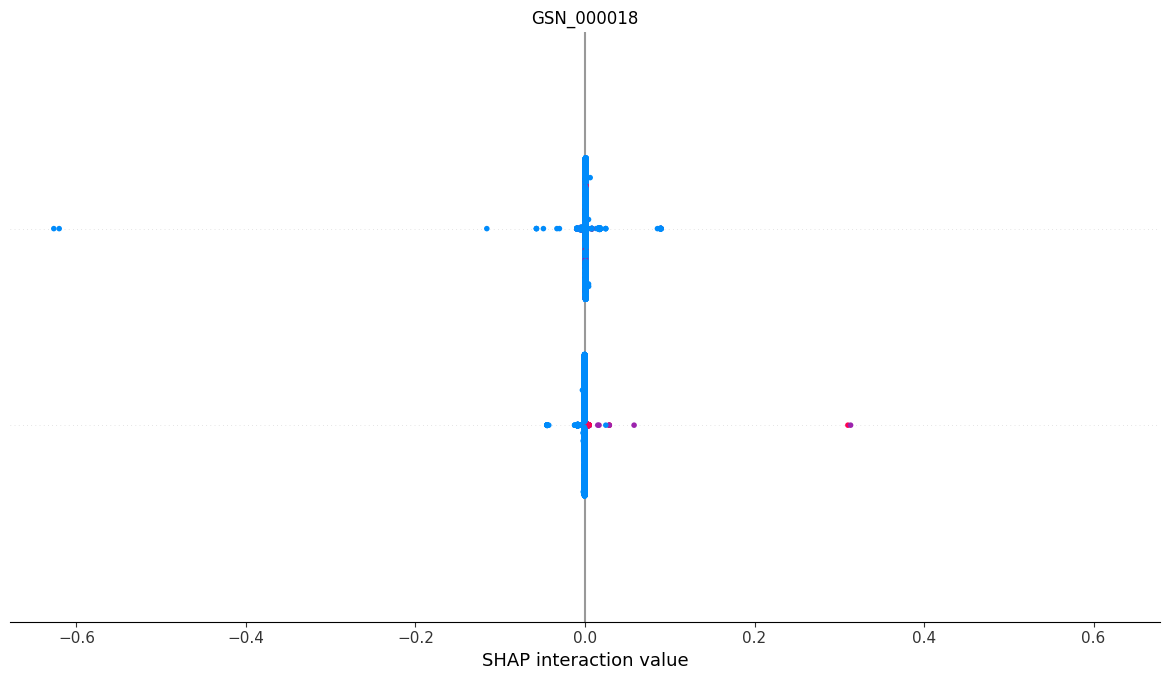

Sensitivity: 0.9380530973451328
Specificity: 0.7573423206547906


In [19]:
# Comparaison avec un modèle de classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap
X_train, y_train = train.drop("correct", axis = 1), train['correct']
X_test, y_test = test.drop("correct", axis = 1), test['correct']

clf = DecisionTreeClassifier(max_depth=45)
clf.fit(X_train, y_train)
explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_test)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred, zero_division=0))
shap.summary_plot(shap_values, X_test, plot_type="bar")

sensitivity = y_pred*y_test # True positive
specificity = (1-y_pred)*(1-y_test) # True negative

sensitivity = sensitivity.sum() / y_test.sum()
specificity = specificity.sum() / (1-y_test).sum()

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')


In [81]:
y_test.value_counts()

correct
False    162352
True       2064
Name: count, dtype: int64

Accuracy: 0.9819995135003649
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      2077
        True       1.00      0.96      0.98      2034

    accuracy                           0.98      4111
   macro avg       0.98      0.98      0.98      4111
weighted avg       0.98      0.98      0.98      4111



<Figure size 640x480 with 0 Axes>

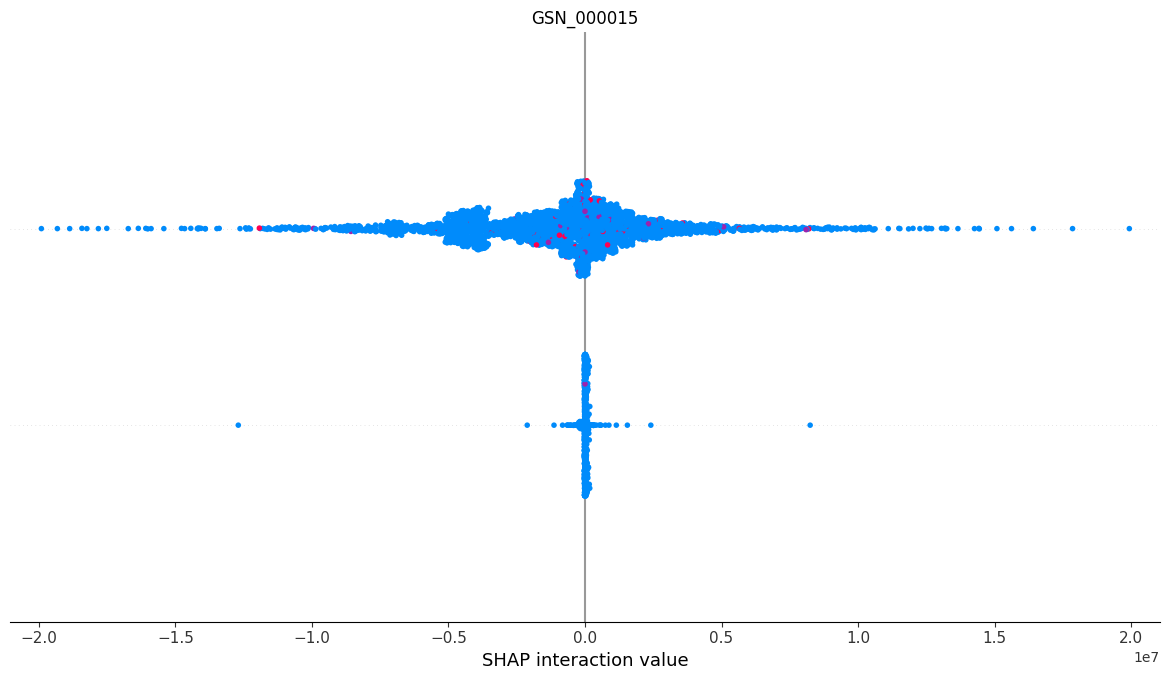

In [22]:
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.metrics import accuracy_score, classification_report

# Vérifiez que X_test est cohérent avec X_train
assert X_train.shape[1] == X_test.shape[1], "Les dimensions de X_train et X_test ne correspondent pas."

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Désactiver la vérification d'additivité si nécessaire
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test, check_additivity=False)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Afficher le graphique SHAP
shap.summary_plot(shap_values, X_test)

In [23]:
sensitivity = y_pred*y_test # True positive
specificity = (1-y_pred)*(1-y_test) # True negative

sensitivity = sensitivity.sum() / y_test.sum()
specificity = specificity.sum() / (1-y_test).sum()

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Sensitivity: 0.9641101278269419
Specificity: 0.9995185363505056
